In [1]:
import numpy as np
import matplotlib.pyplot as plt
import mesa_reader as mr

In [2]:
mearth = 5.97e27
msun = 1.9892e33
rearth = 6.371008e8
rsun = 6.9598e10
rfrac = rsun/rearth
mfrac = msun/mearth

In [3]:
def formatstring(myfloat):
    return '%.5f'%myfloat

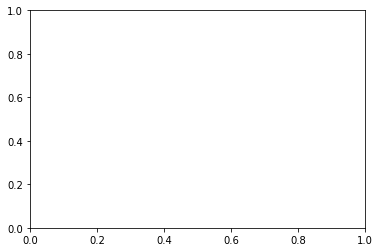

In [4]:
plt.figure()
ax = plt.gca()

In [5]:
mpList = list(np.linspace(7.0,8.0,11))
for i, m in enumerate(mpList):
    mpList[i] = formatstring(m)

In [7]:
fList = list(np.logspace(-4,np.log10(2*(10**-2)),10))
for i, f in enumerate(fList):
    fList[i] = formatstring(f)

In [10]:
entropyList = [7.28,7.28,7.29,7.29,7.3,7.3,7.3,7.31,7.31,7.32,7.32]
for i, ent in enumerate(entropyList):
    entropyList[i] = formatstring(ent)

In [11]:
def envelope_fraction(history):
    return history.envelope_mass/(history.star_mass*msun)

def calcX(history):
    return history.Hydrogen_Mass / history.envelope_mass

def calcY(history):
    return history.He4_Mass / history.envelope_mass

def calcZ(history):    
    return 1 - calcX(history) - calcY(history)

/Users/bridgethaas/miniconda3/envs/python3/lib/python3.7/site-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  import sys


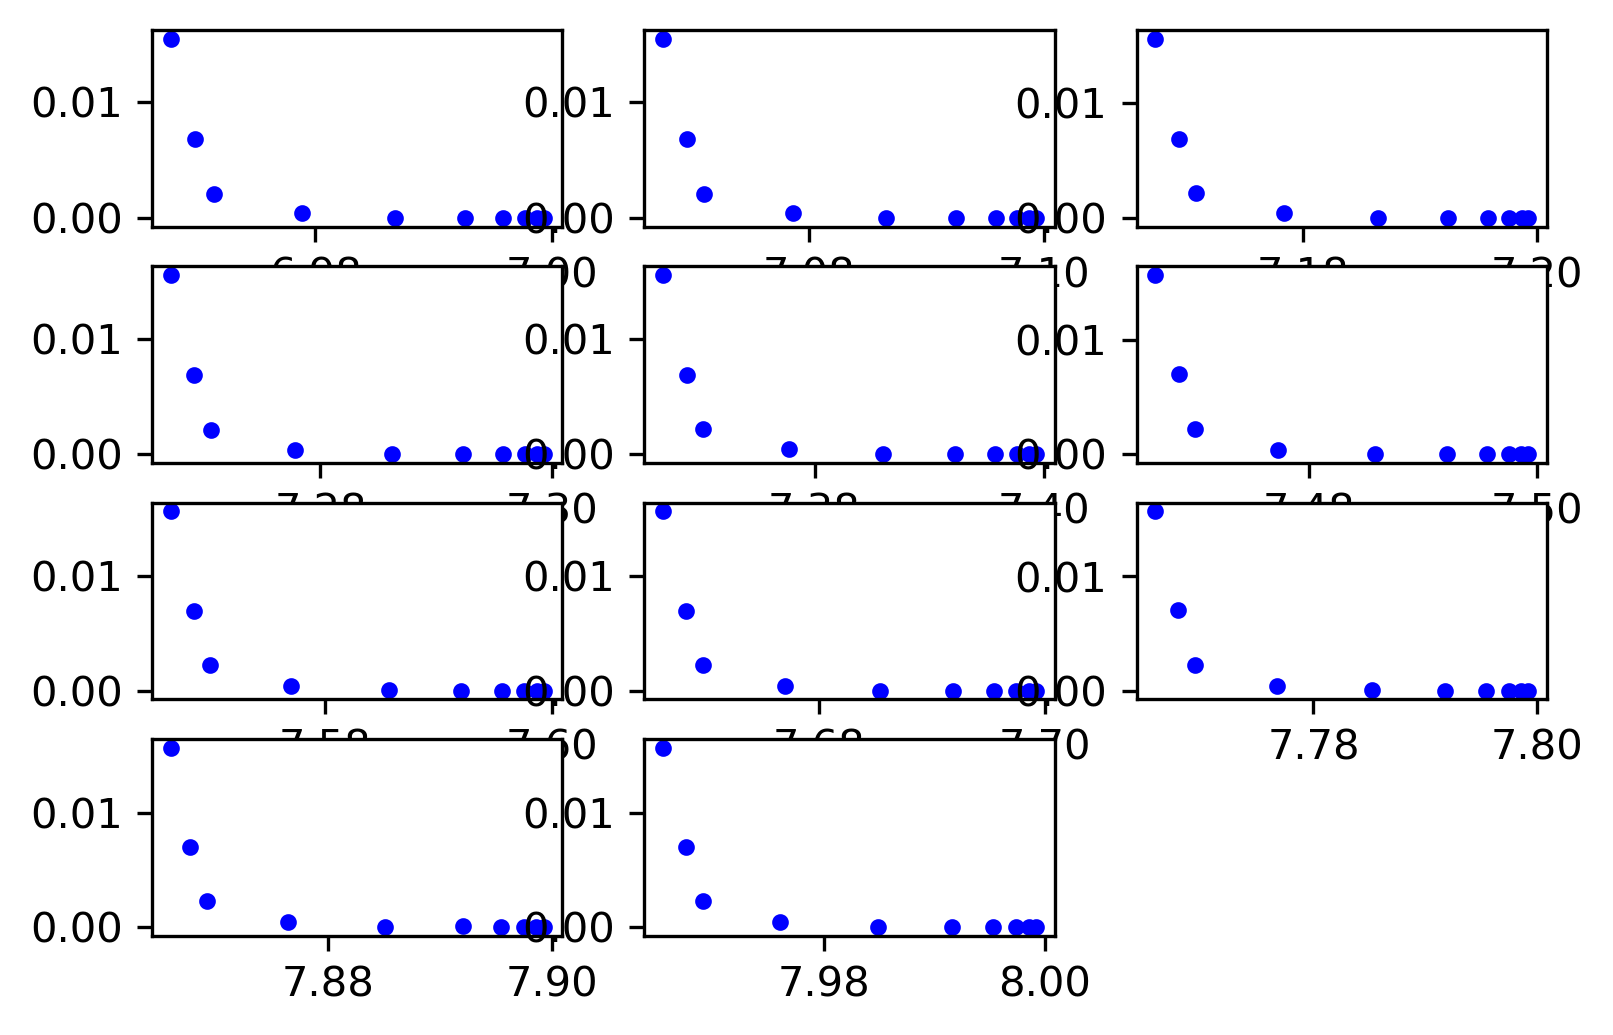

In [15]:
for i, m in enumerate(mpList):
    ent = entropyList[i]
    
    for j, f in enumerate(fList):
        h = mr.MesaData('data/biggrid/hist_evolve_%s_%s_0.24000_0.02000_0.03392_%s_0.10000.data'%(m,f    ,ent) ,file_type='log')

        plt.subplot(4, 3, i+1)
        plt.plot(h.star_mass[-1]*mfrac,h.envelope_mass[-1]/(h.star_mass[-1]*msun),marker='.',color='b')
        
plt.gcf().set_dpi(300)
#ax.set_xlabel('time, Gyr')
#ax.set_ylabel('envelope fraction')
#ax.set_yscale('log')